In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
project_path = '/content/drive/MyDrive/financial-anomaly-detection-paysim'
data_path = f'{project_path}/data/transactions.csv'
src_path = f'{project_path}/src'

# Add src path
import sys
sys.path.append(src_path)

# ✅ Now this works if file name is supervised_model.py
from supervised_model import load_data, train_and_evaluate

In [4]:
import sys
# sys.path.append('/content/drive/MyDrive/financial-anomaly-detection-paysim/src')



# Replace with your actual dataset path
data_path = '/content/drive/MyDrive/financial-anomaly-detection-paysim/data/transactions.csv'

X_train, X_test, y_train, y_test = load_data(data_path)
model = train_and_evaluate(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:35:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9974    0.9987   1906322
           1     0.3259    0.9854    0.4899      2464

    accuracy                         0.9974   1908786
   macro avg     0.6630    0.9914    0.7443   1908786
weighted avg     0.9991    0.9974    0.9980   1908786

ROC AUC Score: 0.9995856462656307
Confusion Matrix:
[[1901301    5021]
 [     36    2428]]


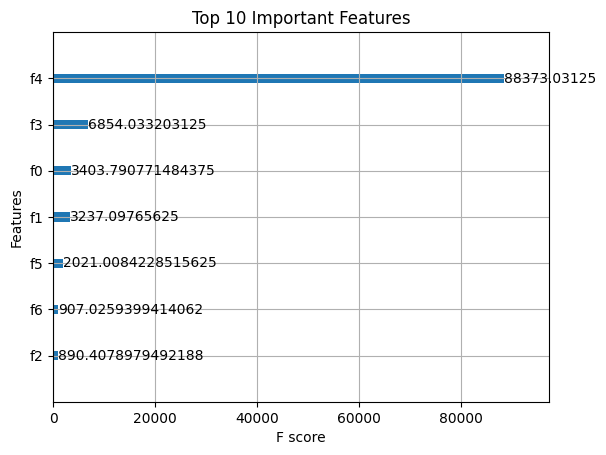

In [7]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Important Features")
plt.show()


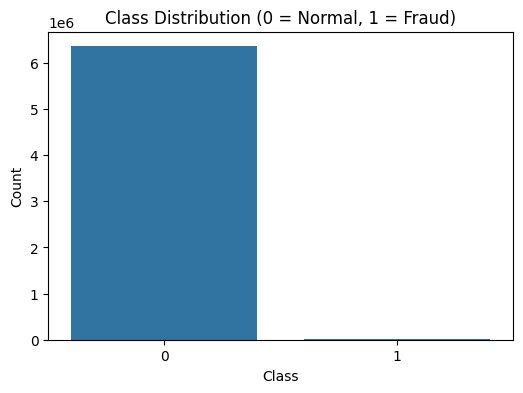

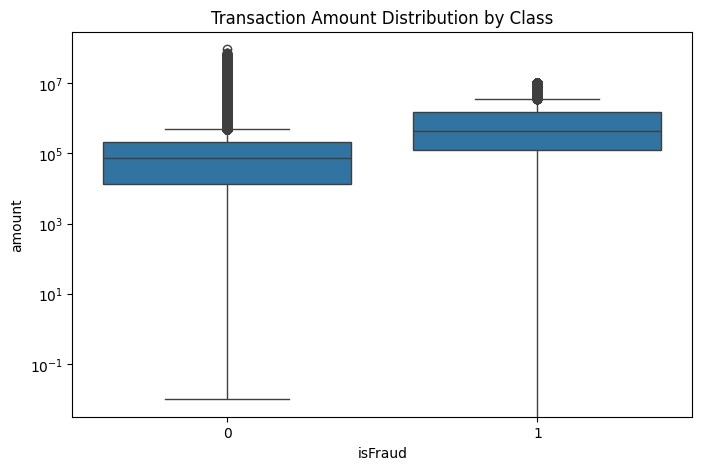

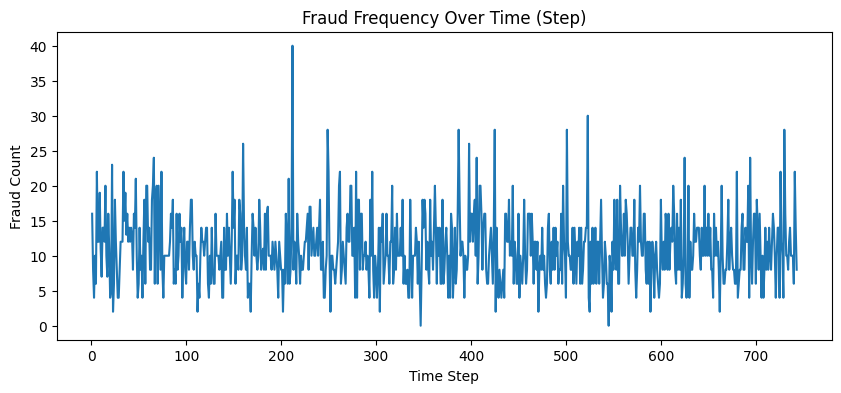

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:40:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


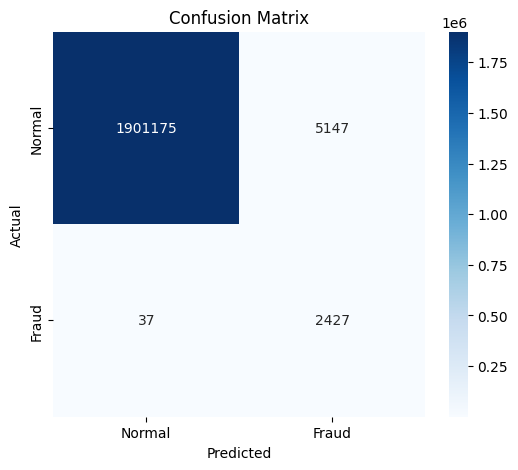

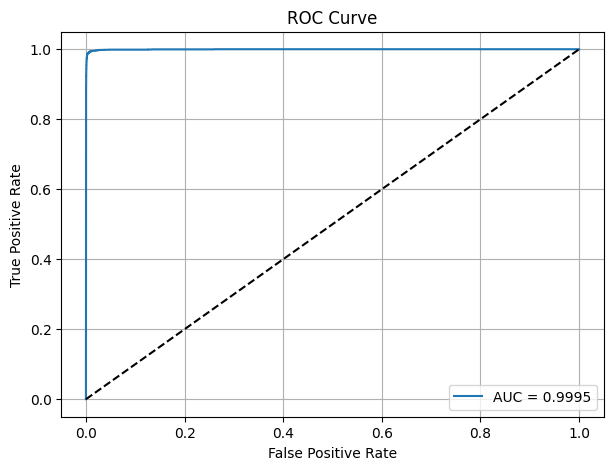

<Figure size 800x600 with 0 Axes>

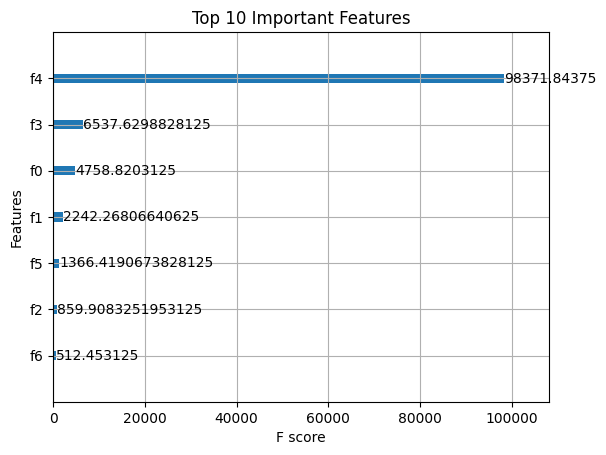

In [5]:
# Re-run the complete plotting setup after reset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('/content/drive/MyDrive/financial-anomaly-detection-paysim/data/transactions.csv')
df['amount_log'] = np.log1p(df['amount'])

# Plot 1: Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df)
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Plot 2: Amount Distribution by Class
plt.figure(figsize=(8, 5))
sns.boxplot(x="isFraud", y="amount", data=df)
plt.yscale('log')
plt.title("Transaction Amount Distribution by Class")
plt.show()

# Plot 3: Time vs Fraud Activity
plt.figure(figsize=(10, 4))
step_fraud = df.groupby("step")["isFraud"].sum().reset_index()
sns.lineplot(x="step", y="isFraud", data=step_fraud)
plt.title("Fraud Frequency Over Time (Step)")
plt.xlabel("Time Step")
plt.ylabel("Fraud Count")
plt.show()

# Prepare data
features = ['amount_log', 'step', 'isFlaggedFraud',
            'oldbalanceOrg','newbalanceOrig',
            'oldbalanceDest','newbalanceDest']
X = df[features].values
y = df["isFraud"].values

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                      scale_pos_weight=np.sum(y_train == 0) / np.sum(y_train == 1),
                      random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Plot 4: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot 5: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# Plot 6: Feature Importance (Top 10)
plt.figure(figsize=(8, 6))
plot_importance(model, importance_type='gain', max_num_features=10)
plt.title("Top 10 Important Features")
plt.show()
